In [14]:
import ROOT
import array
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
!wget -O bdt.xml https://www.hepdata.net/record/resource/406719?view=true

--2019-04-01 07:35:38--  https://www.hepdata.net/record/resource/406719?view=true
Resolving www.hepdata.net (www.hepdata.net)... 188.184.64.140
Connecting to www.hepdata.net (www.hepdata.net)|188.184.64.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 953915 (932K) [text/xml]
Saving to: ‘bdt.xml’

bdt.xml             100%[===================>] 931.56K   605KB/s    in 1.5s    

2019-04-01 07:35:40 (605 KB/s) - ‘bdt.xml’ saved [953915/953915]



In [15]:
ROOT.TMVA.Tools.Instance()
reader = ROOT.TMVA.Reader()

var = [array.array('f',[0]) for i in range(7)]
reader.AddVariable("MET",var[0]);
reader.AddVariable("MT",var[1]);
reader.AddVariable("dMT200",var[2]);
reader.AddVariable("m_tophad",var[3]);
reader.AddVariable("m_toplep200",var[4]);
reader.AddVariable("dphi_lep_nu200",var[5]);
reader.AddVariable("dphi_rjet_lep",var[6]);

reader.BookMVA("BDT method", "bdt.xml")

<ROOT.TMVA::MethodBDT object ("BDT") at 0x55cf1e6050e0>

                         : Booking "BDT method" of type "BDT" from bdt.xml.
                         : Reading weight file: bdt.xml
<HEADER> DataSetInfo              : [Default] : Added class "Signal"
<HEADER> DataSetInfo              : [Default] : Added class "Background"
                         : Booked classifier "BDT" of type: "BDT"


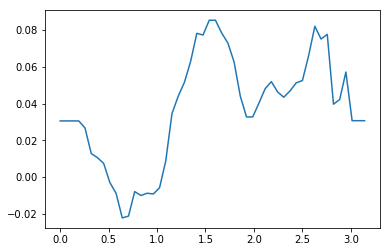

In [16]:
dphis = np.linspace(0,np.pi)
vals = []
for v in dphis:
    var[0][0] = 100000
    var[1][0] = 90000
    var[2][0] = 30000
    var[3][0] = 50000
    var[4][0] = 10000
    var[5][0] = 0.1
    var[6][0] = v
    vals.append(reader.EvaluateMVA("BDT method"))

plt.plot(dphis,vals)